In [1]:
import pandas as pd
import numpy as np
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("/home/aman/Documents/Project/gaia_stellar_ml/data/dataGaia.csv")

### EDA

In [3]:
df

,Unnamed: 0,RA_ICRS,DE_ICRS,Source,Plx,PM,pmRA,pmDE,Gmag,e_Gmag,BPmag,e_BPmag,RPmag,e_RPmag,GRVSmag,e_GRVSmag,BP-RP,BP-G,G-RP,pscol,Teff,Dist,Rad,Lum-Flame,Mass-Flame,Age-Flame,z-Flame,SpType-ELS
0,0,47.451110,2.205457,740830319452928,1.1750,8.488,2.263,-8.181,10.966603,0.002786,11.007946,0.002966,10.875629,0.003844,10.835027,0.044795,0.132317,0.041343,0.090974,NaN,9406.7,918.2012,2.3686,33.161472,2.255,0.404,0.527215,A
1,1,44.375187,2.895901,1402912413121792,1.8937,16.954,7.031,-15.427,10.369156,0.002801,10.441856,0.003698,10.205364,0.004790,10.144014,0.008790,0.236492,0.072701,0.163792,NaN,9348.7,679.7121,2.4642,25.817343,2.157,0.336,0.638083,A
2,2,42.959304,2.920459,1546703623466880,2.9732,2.528,1.795,1.780,10.038978,0.002774,10.212755,0.002847,9.734839,0.003803,9.609872,0.006141,0.477917,0.173778,0.304139,NaN,7520.7,339.8108,1.9321,10.527038,1.688,1.033,0.507551,A
3,3,44.031079,3.203683,1614053005633024,2.2337,10.776,-3.151,-10.305,9.810181,0.002786,10.008457,0.002864,9.471220,0.003815,9.317505,0.014309,0.537237,0.198277,0.338961,1.5956,7052.3,433.9715,2.9735,20.801886,1.923,1.124,0.368294,A
4,4,45.463599,3.138095,1753553543188992,4.0179,10.053,1.828,9.885,8.163041,0.002800,8.197672,0.003043,8.071199,0.003808,8.029378,0.007534,0.126472,0.034631,0.091842,NaN,9982.8,251.2483,2.2829,45.868046,2.447,0.320,0.509338,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611684,26011,311.778738,-2.817825,6915238680497707392,0.2856,5.274,0.893,-5.197,16.205643,0.002840,16.054424,0.003840,16.506952,0.005454,NaN,NaN,-0.452528,-0.151218,-0.301310,NaN,23924.6,26492.7290,2.4058,NaN,NaN,NaN,NaN,O
611685,26012,315.146470,-3.787522,6915399720296544768,0.4307,7.059,3.762,-5.973,17.505617,0.003059,17.365911,0.015148,17.751936,0.024195,NaN,NaN,-0.386024,-0.139706,-0.246319,NaN,18705.6,27591.6270,1.7031,348.576540,NaN,NaN,1.539703,O
611686,26013,314.212016,-3.911283,6915578910626657280,0.0946,10.366,4.105,-9.519,17.026703,0.002833,17.084707,0.006022,16.879510,0.007983,NaN,NaN,0.205196,0.058004,0.147192,NaN,24506.2,25023.5160,2.4927,NaN,NaN,NaN,NaN,O
611687,26014,314.144069,-3.163139,6915690339258525696,0.4152,3.155,1.069,2.968,16.474258,0.002820,16.463255,0.004263,16.408052,0.004960,NaN,NaN,0.055202,-0.011003,0.066206,NaN,27026.5,27164.1540,2.8728,NaN,NaN,NaN,NaN,O


In [4]:
df['BP-RP'].describe()

count    611688.000000
mean          1.318972
std           0.824163
min          -0.627329
25%           0.828152
50%           1.140353
75%           1.736749
max           7.255581
Name: BP-RP, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611689 entries, 0 to 611688
Data columns (total 28 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  611689 non-null  int64  
 1   RA_ICRS     611689 non-null  float64
 2   DE_ICRS     611689 non-null  float64
 3   Source      611689 non-null  int64  
 4   Plx         611689 non-null  float64
 5   PM          611689 non-null  float64
 6   pmRA        611689 non-null  float64
 7   pmDE        611689 non-null  float64
 8   Gmag        611688 non-null  float64
 9   e_Gmag      611688 non-null  float64
 10  BPmag       611688 non-null  float64
 11  e_BPmag     611688 non-null  float64
 12  RPmag       611689 non-null  float64
 13  e_RPmag     611689 non-null  float64
 14  GRVSmag     507721 non-null  float64
 15  e_GRVSmag   507721 non-null  float64
 16  BP-RP       611688 non-null  float64
 17  BP-G        611688 non-null  float64
 18  G-RP        611688 non-null  float64
 19  ps

In [6]:
df.isna().sum()

Unnamed: 0         0
RA_ICRS            0
DE_ICRS            0
Source             0
Plx                0
PM                 0
pmRA               0
pmDE               0
Gmag               1
e_Gmag             1
BPmag              1
e_BPmag            1
RPmag              0
e_RPmag            0
GRVSmag       103968
e_GRVSmag     103968
BP-RP              1
BP-G               1
G-RP               1
pscol         595301
Teff               0
Dist               0
Rad                0
Lum-Flame      14131
Mass-Flame     32728
Age-Flame      73661
z-Flame        14131
SpType-ELS         0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,RA_ICRS,DE_ICRS,Source,Plx,PM,pmRA,pmDE,Gmag,e_Gmag,BPmag,e_BPmag,RPmag,e_RPmag,GRVSmag,e_GRVSmag,BP-RP,BP-G,G-RP,pscol,Teff,Dist,Rad,Lum-Flame,Mass-Flame,Age-Flame,z-Flame
count,611689.000000,611689.000000,611689.000000,6.116890e+05,611689.000000,611689.000000,611689.000000,611689.000000,611688.000000,611688.000000,611688.000000,611688.000000,611689.000000,611689.000000,507721.000000,507721.000000,611688.000000,611688.000000,611688.000000,16388.000000,611689.000000,611689.000000,611689.000000,597558.000000,578961.000000,538028.000000,597558.000000
mean,47422.859898,109.491138,27.375246,1.013625e+18,1.490339,11.264492,1.416328,-5.646765,13.720603,0.002857,14.350161,0.004342,13.031192,0.004397,12.422330,0.065550,1.318972,0.629558,0.689414,1.452694,7194.982554,2106.054944,8.141795,112.631363,1.815272,3.819473,0.441698
std,28774.834121,99.486049,26.856553,1.382727e+18,2.030546,19.482668,16.120819,14.583911,1.690560,0.000569,1.909607,0.004856,1.595143,0.002511,1.358132,0.061751,0.824163,0.526974,0.316330,0.183810,3738.516381,3212.887195,27.977752,328.978393,0.990190,4.147104,0.232343
min,0.000000,0.000205,-89.098460,3.865554e+10,-5.014100,0.002000,-584.663000,-583.413000,2.740842,0.002757,3.023606,0.002794,2.672661,0.003781,2.856422,0.004000,-0.627329,-1.710986,-0.452513,0.424200,3039.200000,10.519300,0.345400,0.034732,0.500000,0.200000,0.001505
25%,21846.000000,46.677751,18.623979,1.415008e+17,0.320800,2.450000,-2.274000,-7.027000,12.775878,0.002765,13.318070,0.002918,12.092450,0.003820,11.665601,0.020596,0.828152,0.323266,0.503698,1.336200,5187.000000,577.857500,1.329100,2.004729,1.036000,0.556000,0.307192
50%,46638.000000,67.259343,31.172183,2.137034e+17,0.872600,5.591000,0.128000,-3.015000,14.102625,0.002772,14.681242,0.003128,13.376509,0.003874,12.841579,0.051180,1.140353,0.480260,0.660124,1.499600,5922.600000,1077.115000,2.031500,10.815703,1.621000,1.493500,0.479016
75%,72125.000000,110.040669,43.118327,1.866048e+18,1.659900,11.078000,3.291000,-0.551000,14.792351,0.002796,15.559367,0.003810,14.016119,0.004008,13.475797,0.091052,1.736749,0.828535,0.909900,1.588225,7988.100000,2529.572300,4.009600,57.071455,2.416000,6.727000,0.568683
max,99999.000000,359.997541,89.774031,6.916186e+18,95.047700,688.189000,606.357000,478.562000,17.649721,0.065528,21.326849,0.323298,18.051123,0.179498,14.099996,1.720903,7.255581,5.552830,2.525836,1.977500,41504.000000,35666.805000,1105.995600,3499.921000,7.521000,13.500000,1.616032


In [8]:
df[['e_Gmag','e_BPmag', 'e_RPmag']].describe()

,e_Gmag,e_BPmag,e_RPmag
count,611688.000000,611688.000000,611689.000000
mean,0.002857,0.004342,0.004397
std,0.000569,0.004856,0.002511
min,0.002757,0.002794,0.003781
25%,0.002765,0.002918,0.003820
50%,0.002772,0.003128,0.003874
75%,0.002796,0.003810,0.004008
max,0.065528,0.323298,0.179498


## cleaning...

In [9]:
# duplicate row cleaning...
df = df.drop_duplicates()

In [10]:
# dropping nulls...
df = df.dropna(subset=['BP-RP','Gmag','e_Gmag','e_BPmag','e_RPmag'])

##### 1. As extintion shifts colour we choose a particular section of BP-RP to work with. Theoretically, intersteller dust absorbs photon, which effects blue light more than red light. So, $(BP-RP)^{observational}>(BP-RP)^{actual}$
##### 2. As $d = \frac{1}{Plx}$ we choose to work Plx>0
##### 3. We also remove high errors

In [11]:
# mentioned in 1, 2 & 3
df = df[
    (df['e_Gmag'] < 0.01) &
    (df['e_BPmag'] < 0.01) &
    (df['e_RPmag'] < 0.01) &
    (df['BP-RP'] >= -0.5) &
    (df['BP-RP'] < 4) &
    (df['Plx'] > 0)
]

#### Absolute Magnitude (luminosity)

$$M_G = G_{mag} + 5\log_{10}(Plx) - 10 $$

In [12]:
# Absolute Magnitude
df['M_G'] = df['Gmag'] + 5*np.log10(df['Plx']) - 10

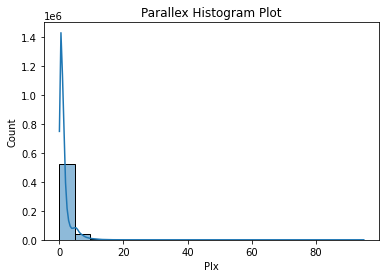

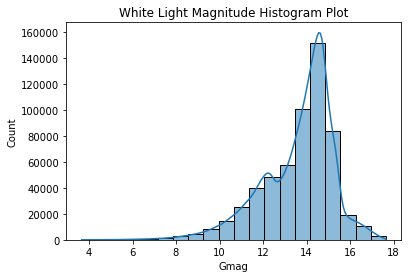

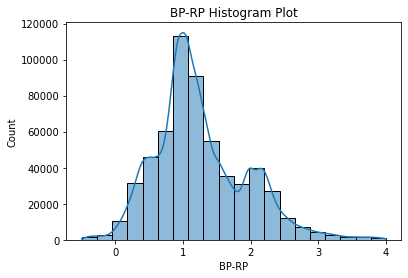

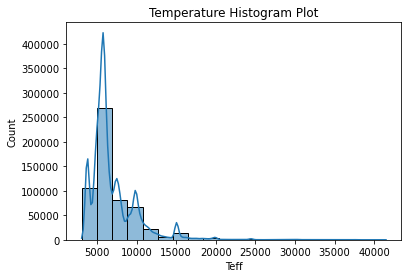

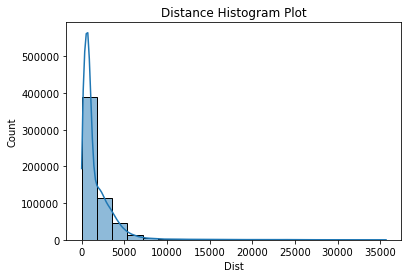

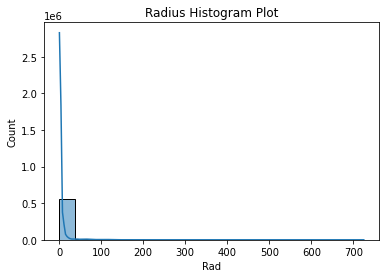

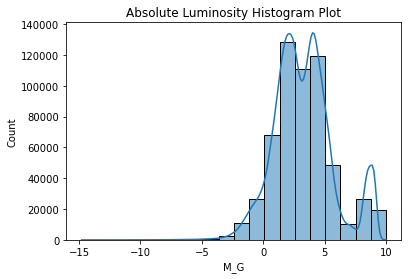

In [13]:
columns = ['Plx', 'Gmag', 'BP-RP', 'Teff', 'Dist','Rad', 'M_G']
labels = ['Parallex', 'White Light Magnitude', 'BP-RP', 'Temperature','Distance','Radius','Absolute Luminosity']

for i, col in enumerate(columns):
    plt.figure(figsize=(6,4))
    plt.title(f'{labels[i]} Histogram Plot')
    sns.histplot(df[col], kde=True, bins=20)

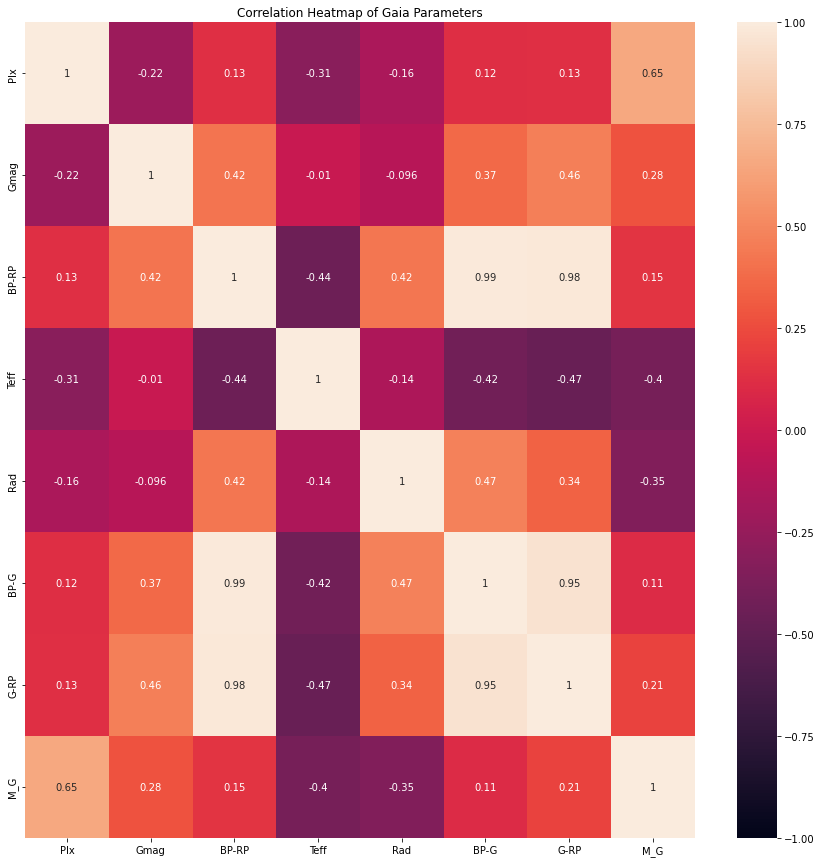

In [14]:
cols = [
    'Plx', 'Gmag', 'BP-RP', 'Teff', 'Rad', 'BP-G', 'G-RP','M_G'
]

cdf = df[cols].select_dtypes(include='number')

plt.figure(figsize=(15,15))
sns.heatmap(cdf.corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Gaia Parameters')
plt.show()

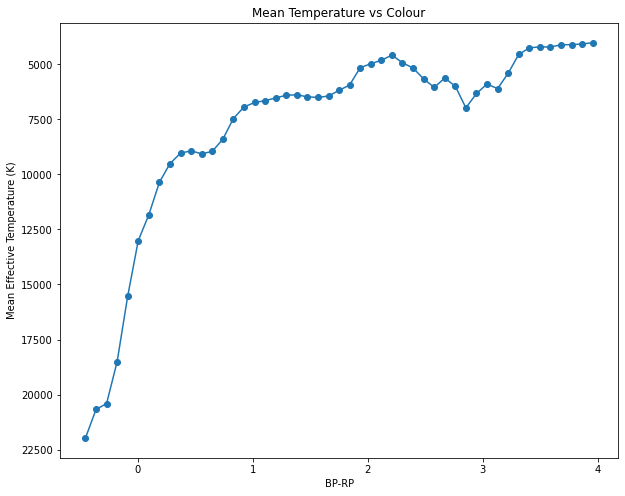

In [15]:
bins = np.linspace(df['BP-RP'].min(), df['BP-RP'].max(), 50)
mean_teff, _, _ = binned_statistic(df['BP-RP'], df['Teff'], statistic='mean', bins=bins)

bin_centers = 0.5 * (bins[:-1] + bins[1:])

plt.figure(figsize=(10,8))
plt.plot(bin_centers, mean_teff, marker='o')
plt.gca().invert_yaxis()
plt.xlabel('BP-RP')
plt.ylabel('Mean Effective Temperature (K)')
plt.title('Mean Temperature vs Colour')
plt.show()

In [16]:
cdf

,Plx,Gmag,BP-RP,Teff,Rad,BP-G,G-RP,M_G
0,1.1750,10.966603,0.132317,9406.7,2.3686,0.041343,0.090974,1.316792
1,1.8937,10.369156,0.236492,9348.7,2.4642,0.072701,0.163792,1.755712
2,2.9732,10.038978,0.477917,7520.7,1.9321,0.173778,0.304139,2.405099
3,2.2337,9.810181,0.537237,7052.3,2.9735,0.198277,0.338961,1.555305
4,4.0179,8.163041,0.126472,9982.8,2.2829,0.034631,0.091842,1.183037
...,...,...,...,...,...,...,...,...
611682,0.4433,16.793074,-0.375629,19994.3,2.0408,-0.126251,-0.249378,5.026563
611684,0.2856,16.205643,-0.452528,23924.6,2.4058,-0.151218,-0.301310,3.484434
611686,0.0946,17.026703,0.205196,24506.2,2.4927,0.058004,0.147192,1.906159
611687,0.4152,16.474258,0.055202,27026.5,2.8728,-0.011003,0.066206,4.565545


## feature selection

In [17]:
features = ['BP-RP', 'M_G']

X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
kmeans = KMeans(
    n_clusters=3,
    n_init=40,
    random_state=42
)

labels = kmeans.fit_predict(X_scaled)

In [19]:
df['cluster'] = labels

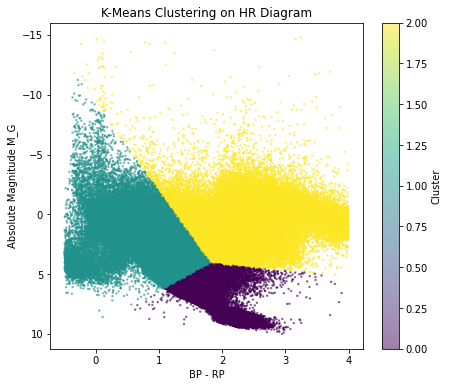

In [20]:
plt.figure(figsize=(7, 6))
scatter = plt.scatter(
    df['BP-RP'],
    df['M_G'],
    c=df['cluster'],
    s=2,
    alpha=0.5
)

plt.gca().invert_yaxis()
plt.xlabel('BP - RP')
plt.ylabel('Absolute Magnitude M_G')
plt.title('K-Means Clustering on HR Diagram')
plt.colorbar(label='Cluster')
plt.show()

In [21]:
import numpy as np
from sklearn.metrics import silhouette_score

np.random.seed(42)
sample_size = 5000

idx = np.random.choice(len(X_scaled), size=sample_size, replace=False)

sil = silhouette_score(
    X_scaled[idx],
    labels[idx]
)

print("Silhouette score (sampled):", sil)

Silhouette score (sampled): 0.48274778108168137


In [22]:
df.groupby('cluster')[['BP-RP', 'M_G']].mean()

,BP-RP,M_G
cluster,,
0,1.899803,7.584891
1,0.895784,3.064613
2,2.164652,0.836175


## Cluster Interpretation

Cluster 0 — Main Sequence
This cluster forms a continuous diagonal band in the HR diagram, extending from hot, luminous stars to cool, faint stars. These objects are consistent with hydrogen-burning main sequence stars. The broad spread reflects the wide mass range of main sequence stars.

Cluster 1 — Red Giants
Stars in this cluster occupy the upper-right region of the HR diagram, with large BP–RP values and high luminosities. This location is characteristic of evolved red giant stars with expanded envelopes and cooler surface temperatures.

Cluster 2 — White Dwarfs
This cluster appears in the lower-left region of the HR diagram, consisting of hot but intrinsically faint objects. These properties are consistent with white dwarfs, which are compact stellar remnants with no ongoing nuclear fusion.
